In [1]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt
import graphviz

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [10]:
X_test == scaler.inverse_transform(X_test_sc)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [16]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=1, random_state=4)
X += 3

(0.0, 16.0)

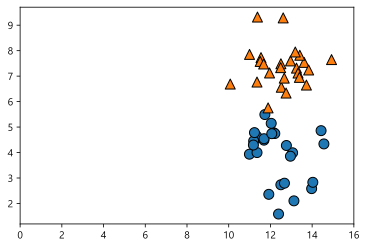

In [18]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlim(0, 16)

In [22]:
scaler = QuantileTransformer(n_quantiles=50, output_distribution='normal').fit(X)
X_sc = scaler.transform(X)

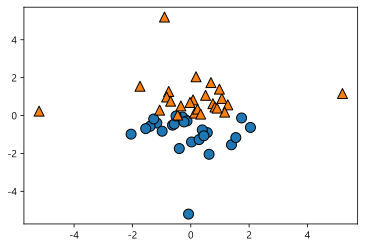

In [23]:
mglearn.discrete_scatter(X_sc[:, 0], X_sc[:, 1], y)

In [24]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [26]:
svm = SVC(gamma='auto').fit(X_train, y_train)
svm.score(X_test, y_test)

0.6293706293706294

In [28]:
pipe = make_pipeline(MinMaxScaler(), SVC(gamma='auto')).fit(X_train, y_train)
pipe.score(X_test, y_test)

0.951048951048951

In [29]:
pipe = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
pipe.score(X_test, y_test)

0.965034965034965

In [32]:
array = np.array([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(array)
imp_mean.transform(array)

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

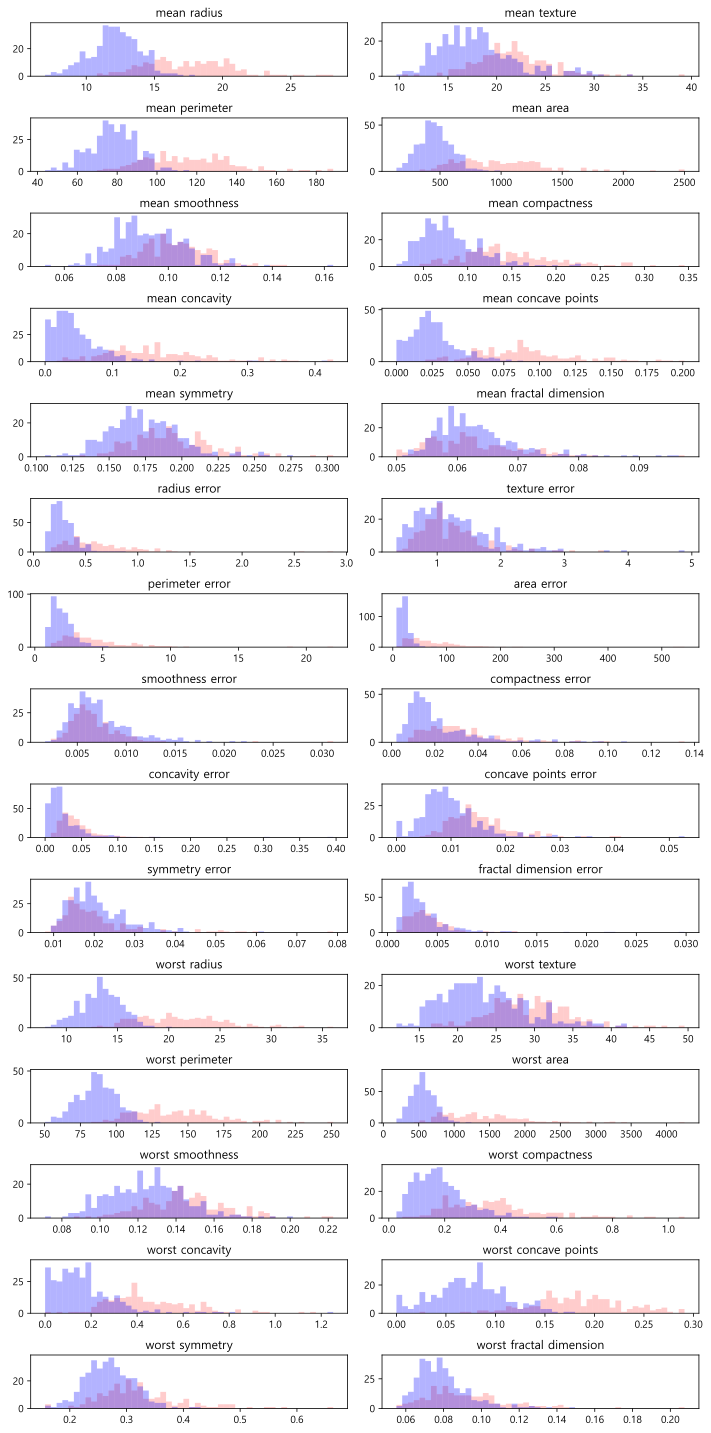

In [35]:
fig, axs = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer['data'][cancer['target'] == 0]
benign = cancer['data'][cancer['target'] == 1]
ax = axs.ravel()
for i in range(30):
    _, bins = np.histogram(cancer['data'][:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=0.2)
    ax[i].hist(benign[:, i], bins=bins, color='blue', alpha=0.3)
    ax[i].set_title(cancer['feature_names'][i])
fig.tight_layout()

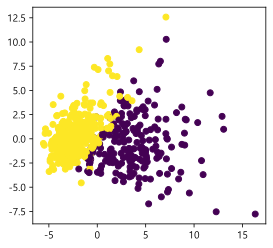

In [45]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2)).fit(cancer['data'])
X_pca = pipe.transform(cancer['data'])
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer['target'])
plt.gca().set_aspect('equal')

In [47]:
pipe.named_steps['pca'].components_.shape

(2, 30)

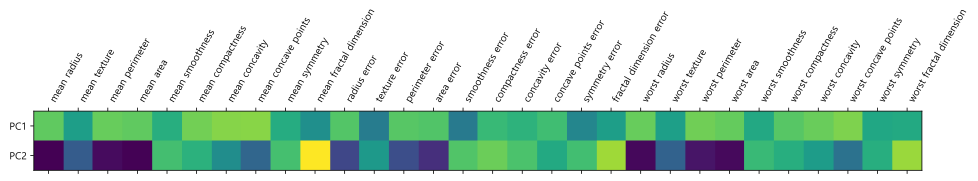

In [52]:
plt.matshow(pipe.named_steps['pca'].components_, cmap='viridis')
plt.yticks([0, 1], ['PC1', 'PC2'])
plt.xticks(range(len(cancer['feature_names'])), cancer['feature_names'], ha='left', rotation=60)
plt.show()

In [53]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.44272026, 0.18971182])

In [55]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=30)).fit(cancer['data'])
X_pca = pipe.transform(cancer['data'])

In [56]:
pipe.named_steps['pca'].explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

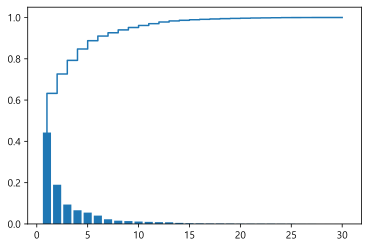

In [59]:
plt.bar(range(1, len(cancer['feature_names']) + 1), pipe.named_steps['pca'].explained_variance_ratio_)
plt.step(range(1, len(cancer['feature_names']) + 1), np.cumsum(pipe.named_steps['pca'].explained_variance_ratio_))

In [60]:
pipe.named_steps['pca'].n_components_

30

In [64]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.5)
image_shape = people.images[0].shape

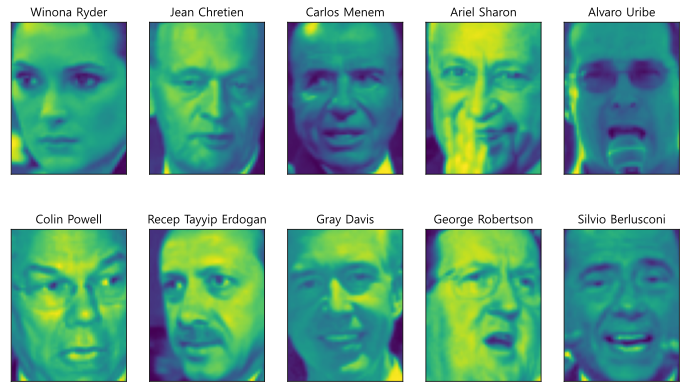

In [65]:
fig, axs = plt.subplots(2, 5, figsize=(12, 7), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people['target'], people['images'], axs.ravel()):
    ax.imshow(image)
    ax.set_title(people['target_names'][target])

In [67]:
people['images'].shape

(3023, 62, 47)

In [70]:
counts = np.bincount(people['target'])
for i, (count, name) in enumerate(zip(counts, people['target_names'])):
    print(f'{name:25} {count:3}', end='        ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39        Alvaro Uribe               35        Amelie Mauresmo            21        
Andre Agassi               36        Angelina Jolie             20        Ariel Sharon               77        
Arnold Schwarzenegger      42        Atal Bihari Vajpayee       24        Bill Clinton               29        
Carlos Menem               21        Colin Powell              236        David Beckham              31        
Donald Rumsfeld           121        George Robertson           22        George W Bush             530        
Gerhard Schroeder         109        Gloria Macapagal Arroyo    44        Gray Davis                 26        
Guillermo Coria            30        Hamid Karzai               22        Hans Blix                  39        
Hugo Chavez                71        Igor Ivanov                20        Jack Straw                 28        
Jacques Chirac             52        Jean Chretien              55        Jennifer Aniston           21 

In [95]:
mask = np.zeros(people['target'].shape, dtype=bool)
for target in np.unique(people['target']):
    mask[np.where(people['target'] == target)[0][:50]] = True

In [96]:
X_people = people['data'][mask] / 255
y_people = people['target'][mask]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [99]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn.score(X_test, y_test)

0.24031007751937986